<a href="https://colab.research.google.com/github/Khhushhiiii/Mcdonalds_market_segemntation/blob/main/Khushi_Gupta_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# McDonalds Market Segmentation
### Name : Suraj Shet

## Importing Libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('mcdonalds.csv')

In [110]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [112]:
df.shape

(1453, 15)

In [113]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


## Label Encoding

In [114]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()


In [115]:
df['yummy'] = l1.fit_transform(df['yummy'])
df['convenient'] = l1.fit_transform(df['convenient'])
df['spicy'] = l1.fit_transform(df['spicy'])
df['fattening'] = l1.fit_transform(df['fattening'])
df['greasy'] = l1.fit_transform(df['greasy'])
df['fast'] = l1.fit_transform(df['fast'])
df['cheap'] = l1.fit_transform(df['cheap'])
df['tasty'] = l1.fit_transform(df['tasty'])
df['expensive'] = l1.fit_transform(df['expensive'])
df['healthy'] = l1.fit_transform(df['healthy'])
df['disgusting'] = l1.fit_transform(df['disgusting'])
df['Like'] = l1.fit_transform(df['Like'])
df['VisitFrequency'] = l1.fit_transform(df['VisitFrequency'])
df['Gender'] = l1.fit_transform(df['Gender'])

In [116]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [117]:
df.mean(axis=0)

yummy              0.552650
convenient         0.907777
spicy              0.093599
fattening          0.867171
greasy             0.526497
fast               0.900206
cheap              0.598761
tasty              0.644184
expensive          0.357880
healthy            0.198899
disgusting         0.242946
Like               4.636614
Age               44.604955
VisitFrequency     2.637990
Gender             0.457674
dtype: float64

## Standardization

In [118]:
from sklearn.preprocessing import StandardScaler
features = df.columns
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

## PCA

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [120]:
from sklearn.decomposition import PCA


pca = PCA()


MD_pca = pca.fit_transform(df)


explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_


print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nSingular Values:")
print(singular_values)


Explained Variance Ratio:
[9.22303196e-01 5.43995063e-02 1.39597297e-02 2.40154037e-03
 1.64192323e-03 1.10309036e-03 9.85301873e-04 7.00122541e-04
 5.09420791e-04 4.36645579e-04 3.62570162e-04 3.42364031e-04
 3.20004441e-04 2.80706891e-04 2.53877675e-04]

Singular Values:
[542.00454008 131.63262644  66.68137891  27.65737849  22.86875339
  18.74440299  17.71539017  14.93320743  12.73809256  11.79317115
  10.74637764  10.44263583  10.09587746   9.45567648   8.99245605]


In [121]:
x = df.iloc[:,0:11].values

In [122]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(x)
# Get the summary information
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
# Print the results
print("Importance of components:")
for i in range(len(explained_variance)):
    print(f"PC{i+1}:\n Standard deviation {np.sqrt(explained_variance[i]):.4f}")
    print(f"Proportion of Variance {explained_variance_ratio[i]:.4f}")
    print(f"Cumulative Proportion {cumulative_explained_variance_ratio[i]:.4f}")

Importance of components:
PC1:
 Standard deviation 0.7570
Proportion of Variance 0.2994
Cumulative Proportion 0.2994
PC2:
 Standard deviation 0.6075
Proportion of Variance 0.1928
Cumulative Proportion 0.4922
PC3:
 Standard deviation 0.5046
Proportion of Variance 0.1330
Cumulative Proportion 0.6253
PC4:
 Standard deviation 0.3988
Proportion of Variance 0.0831
Cumulative Proportion 0.7084
PC5:
 Standard deviation 0.3374
Proportion of Variance 0.0595
Cumulative Proportion 0.7679
PC6:
 Standard deviation 0.3103
Proportion of Variance 0.0503
Cumulative Proportion 0.8182
PC7:
 Standard deviation 0.2897
Proportion of Variance 0.0438
Cumulative Proportion 0.8620
PC8:
 Standard deviation 0.2751
Proportion of Variance 0.0395
Cumulative Proportion 0.9016
PC9:
 Standard deviation 0.2653
Proportion of Variance 0.0368
Cumulative Proportion 0.9383
PC10:
 Standard deviation 0.2488
Proportion of Variance 0.0324
Cumulative Proportion 0.9707
PC11:
 Standard deviation 0.2369
Proportion of Variance 0.0293


In [123]:
pca = PCA()
MD_pca = pca.fit_transform(x)
standard_deviations = np.sqrt(pca.explained_variance_)
rotation = pca.components_.T
print("Standard deviations (1, .., p=11):")
print(standard_deviations.round(1))
print("Rotation (n x k) = (11 x 11):")
print(rotation.round(3))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) = (11 x 11):
[[-0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572 -0.11
   0.045]
 [-0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.06  -0.113 -0.018 -0.666
  -0.542]
 [-0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.4   -0.076
   0.142]
 [ 0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.59  -0.161 -0.005
   0.251]
 [ 0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003  0.009
   0.002]
 [-0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166  0.24
   0.339]
 [-0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.04   0.14   0.076  0.428
  -0.489]
 [-0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.36  -0.073 -0.639  0.079
   0.02 ]
 [ 0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.03   0.067  0.454
  -0.49 ]
 [-0.214  0.077  0.192  0.763  0.288 -0.178 -0.35   0.176 -0.186 -0.038
   0.158]
 [ 0.375 -0.14  -0.089  0.37  -0.729 -0.211 -0.027 -0.167 -0.072 -0.29


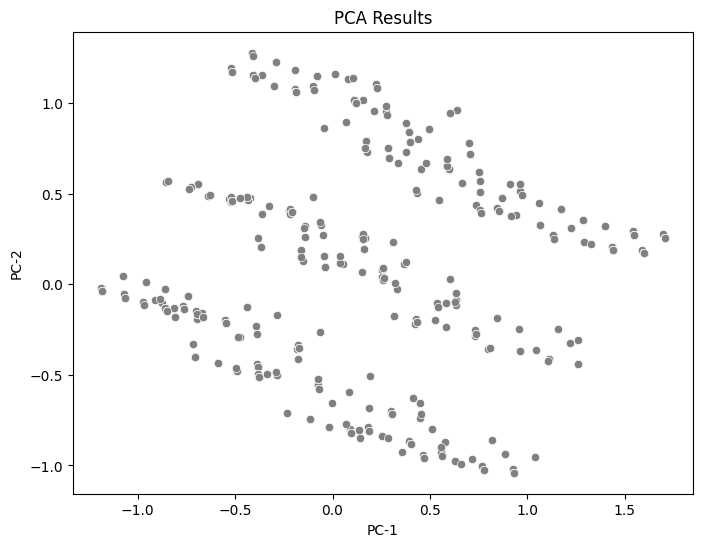

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=MD_pca, x=MD_pca[:, 0], y=MD_pca[:, 1], color='grey')
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("PCA Results")
plt.show()

In [125]:

from sklearn.cluster import KMeans

np.random.seed(1234)


k_range = range(2, 9)  
n_rep = 10  
MD_kmeans = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=n_rep)
    kmeans.fit(df)
    MD_kmeans[k] = kmeans


MD_km28 = {}

for k, kmeans in MD_kmeans.items():
    labels = kmeans.labels_
    relabeled_labels = labels + 1  # Relabel starting from 1
    MD_km28[k] = relabeled_labels

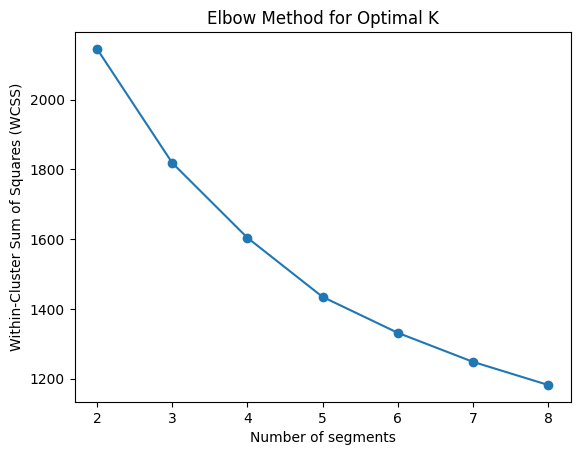

In [126]:
from sklearn.cluster import KMeans
np.random.seed(1234)
k_values = range(2, 9)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

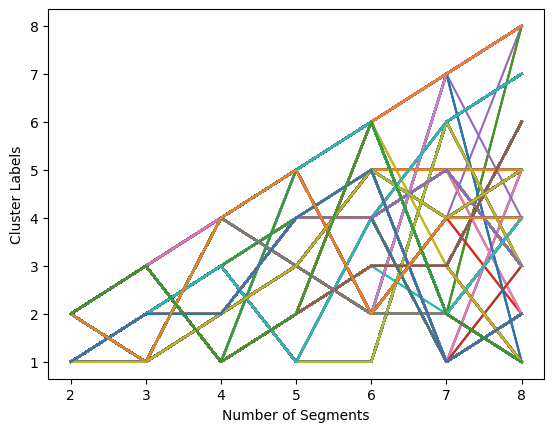

In [127]:
k_values = list(MD_km28.keys())
labels = list(MD_km28.values())
plt.plot(k_values, labels)
plt.xlabel("Number of Segments")
plt.ylabel("Cluster Labels")
plt.show()

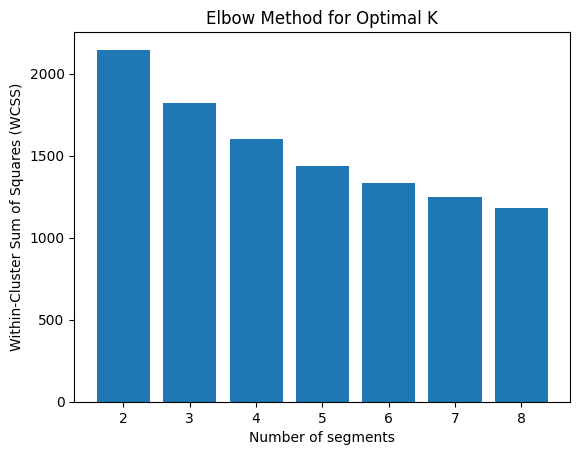

In [128]:
plt.bar(k_values, wcss)
plt.xlabel("Number of segments")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [130]:
df_reset = df.reset_index(drop=True)

k_range = range(2, 9) 
n_rep = 10  
n_boot = 100  
MD_boot = {}

for k in k_range:
    MD_boot[k] = []

    for _ in range(n_boot):
        sample_indices = np.random.choice(range(len(df_reset)), size=len(df_reset), replace=True)
        bootstrap_sample = df_reset.iloc[sample_indices]

        kmeans = KMeans(n_clusters=k, n_init=n_rep)
        kmeans.fit(bootstrap_sample)
        labels = kmeans.labels_

        MD_boot[k].append(labels)

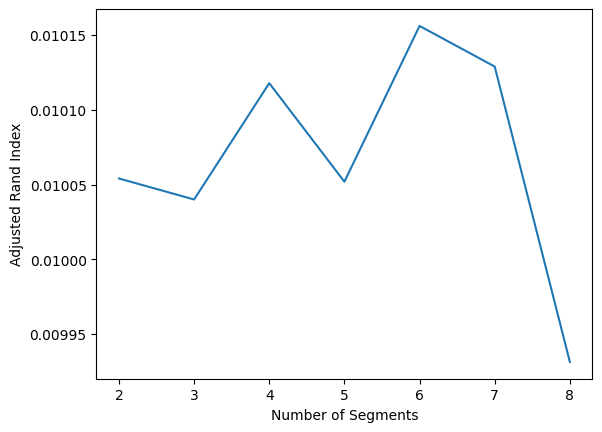

In [131]:
from sklearn.metrics import adjusted_rand_score

ARI_values = []

for k, bootstraps in MD_boot.items():
    ARI_scores = []

    for labels in bootstraps:
        ARI = adjusted_rand_score(labels, MD_boot[k][0])
        ARI_scores.append(ARI)

    mean_ARI = np.mean(ARI_scores)
    ARI_values.append(mean_ARI)

plt.plot(k_range, ARI_values)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.show()

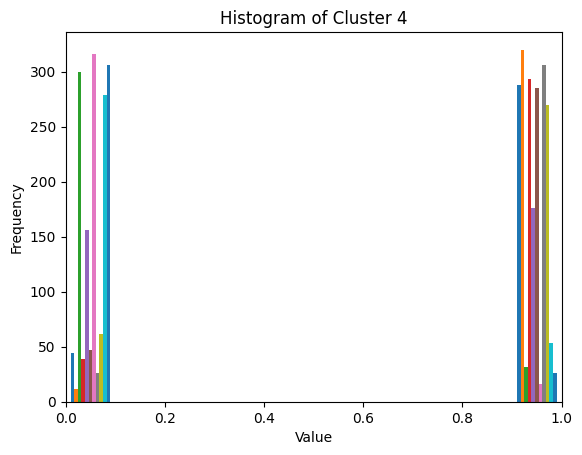

In [129]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(x)
cluster_labels = kmeans.labels_

cluster_4_indices = np.where(cluster_labels == 3)[0]  
cluster_4_data = x[cluster_4_indices]

plt.hist(cluster_4_data, bins=np.linspace(0, 1, 11))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4")
plt.xlim(0, 1)
plt.show()


In [135]:

k_values = range(2, 9)
MD_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(df)
    MD_clusters.append(labels)

# Print the cluster labels
for i, labels in enumerate(MD_clusters):
    print(f"Segment {i+2} labels:")
    print(labels)


Segment 2 labels:
[0 0 0 ... 0 1 1]
Segment 3 labels:
[1 0 1 ... 1 0 2]
Segment 4 labels:
[1 3 1 ... 3 0 2]
Segment 5 labels:
[2 3 2 ... 3 0 4]
Segment 6 labels:
[1 3 1 ... 3 0 4]
Segment 7 labels:
[4 0 5 ... 0 3 1]
Segment 8 labels:
[0 3 5 ... 3 7 1]


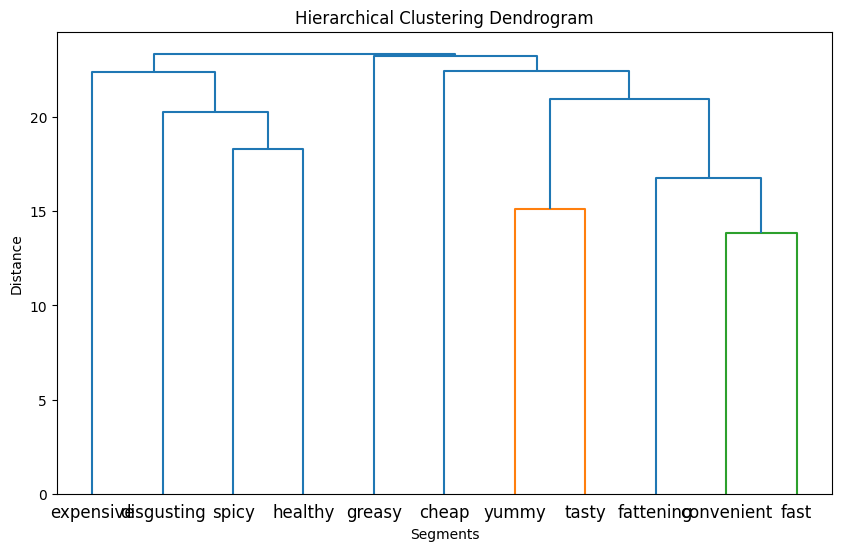

In [134]:

from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram

MD_distances = distance.pdist(np.transpose(x))
MD_vclust = linkage(MD_distances)

plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=df.columns[:11])
plt.xlabel("Segments")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


<ipython-input-136-d98d550a7647>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3')


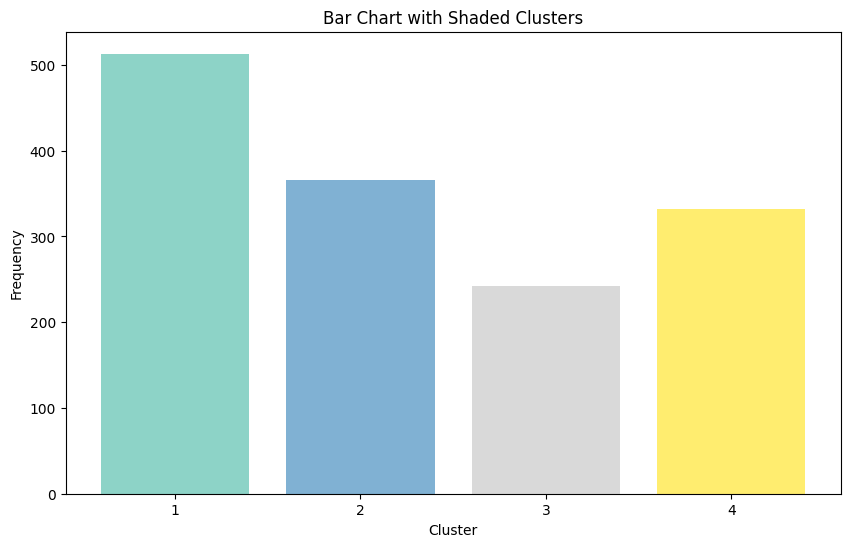

In [136]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(x)
MD_k4_labels = kmeans.labels_

cluster_counts = np.bincount(MD_k4_labels)

cmap = plt.cm.get_cmap('Set3')

plt.figure(figsize=(10, 6))
bar_positions = np.arange(1, len(cluster_counts) + 1)
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(cluster_counts))]
plt.bar(bar_positions, cluster_counts, color=bar_colors)

plt.xticks(bar_positions, [int(x) for x in bar_positions])

plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Bar Chart with Shaded Clusters")

plt.show()

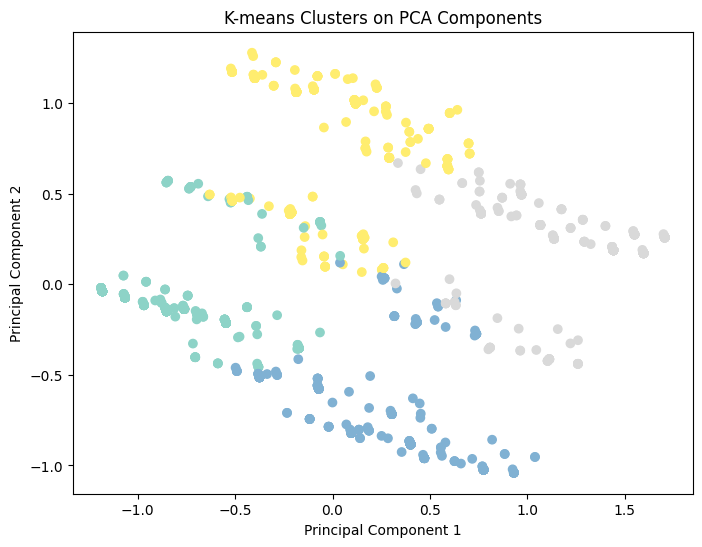

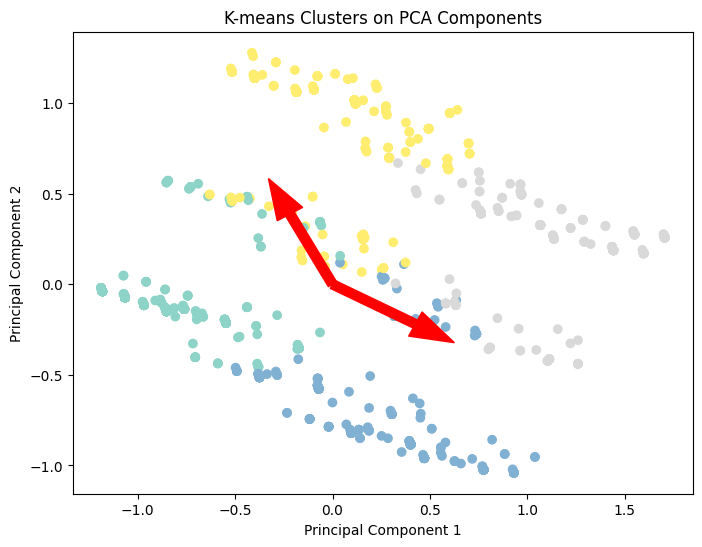

In [162]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4_labels, cmap='Set3')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters on PCA Components")
plt.show()

# Plotting the projection axes
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4_labels, cmap='Set3')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters on PCA Components")

# Add projection axes
plt.arrow(0, 0, MD_pca[0, 0], MD_pca[0, 1], color='red', width=0.05)
plt.arrow(0, 0, MD_pca[1, 0], MD_pca[1, 1], color='red', width=0.05)

plt.show()

<ipython-input-138-20031b73c2bb>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))


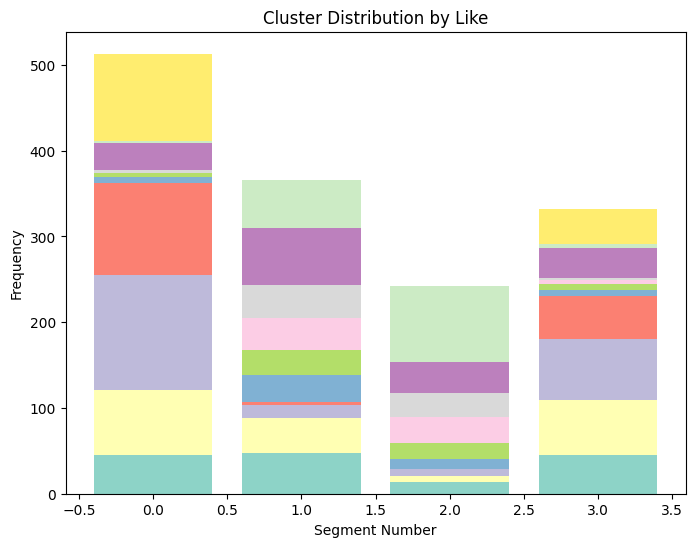

In [138]:
#Step7: Describing segments
# Get the cluster distribution
cluster_counts = np.bincount(MD_k4_labels)

# Get the "Like" column from the original data
like_column = df['Like'].values

# Calculate the frequency of each combination of cluster and "Like"
cluster_like_counts = np.zeros((len(cluster_counts), np.max(like_column) + 1))
for i, cluster_label in enumerate(MD_k4_labels):
    cluster_like_counts[cluster_label, like_column[i]] += 1

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))
bottom = np.zeros(len(cluster_counts))
for i in range(cluster_like_counts.shape[1]):
    plt.bar(range(len(cluster_counts)), cluster_like_counts[:, i], bottom=bottom, color=colors[i])
    bottom += cluster_like_counts[:, i]

# Set the labels and title
plt.xlabel("Segment Number")
plt.ylabel("Frequency")
plt.title("Cluster Distribution by Like")

plt.show()


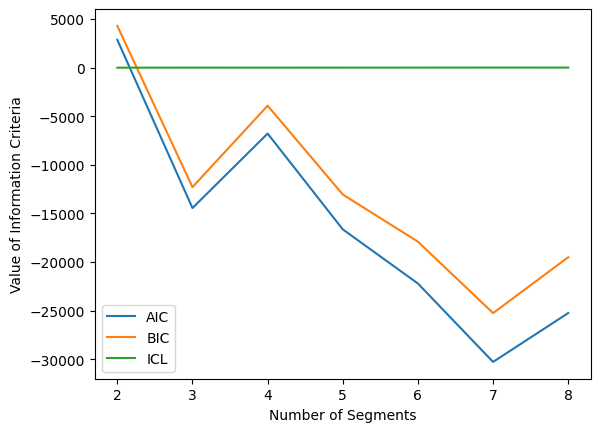

In [139]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

k_values = range(2, 9)
MD_models = []
aic_values = []
bic_values = []
icl_values = []

for k in k_values:
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(df)
    MD_models.append(model)
    aic_values.append(model.aic(df))
    bic_values.append(model.bic(df))
    icl_values.append(model.lower_bound_)

# Plot the information criteria
plt.plot(k_values, aic_values, label="AIC")
plt.plot(k_values, bic_values, label="BIC")
plt.plot(k_values, icl_values, label="ICL")
plt.xlabel("Number of Segments")
plt.ylabel("Value of Information Criteria")
plt.legend()
plt.show()



In [140]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Assuming MD_k4 and MD_m4 are the KMeans and GaussianMixture models, respectively

# Get cluster assignments
kmeans_clusters = KMeans(n_clusters=4).fit_predict(df)
mixture_clusters = GaussianMixture(n_components=4).fit_predict(df)

# Create contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print(contingency_table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0   1    2   3
kmeans                  
0        71   3  271  37
1        60  10  242  59
2        38   0  276  15
3        59   2  272  38


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


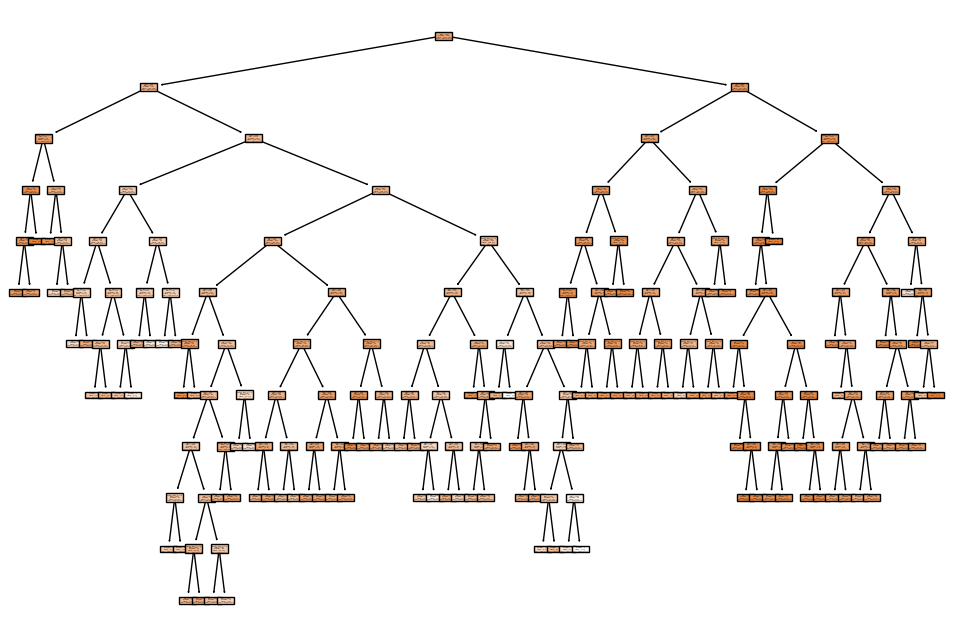

In [142]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder

# Convert k4 == 3 to binary
MD_k4_binary = (MD_k4_labels == 3).astype(int)

# Create a DataFrame with the required variables
df_new = pd.DataFrame({'Cluster': MD_k4_binary, 'Age': df['Age'], 'Gender': df['Gender']})

# Perform one-hot encoding on the 'Gender' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_gender = pd.DataFrame(encoder.fit_transform(df[['Gender']]), columns=['Gender_Male'])
df_encoded = pd.concat([df_new, encoded_gender], axis=1).drop('Gender', axis=1)

# Create the decision tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(df_encoded.drop('Cluster', axis=1), df_encoded['Cluster'])

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=df_encoded.columns[1:], class_names=['Other Clusters', 'Cluster 3'], filled=True)

plt.show()


In [143]:

# Get cluster assignments from KMeans
kmeans_clusters = KMeans(n_clusters=4).fit_predict(df)

# Fit Gaussian Mixture Model with KMeans clusters
gmm_model = GaussianMixture(n_components=4)
gmm_model.fit(df)

# Get cluster assignments from Gaussian Mixture Model
gmm_clusters = gmm_model.predict(df)

# Create contingency table
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print(contingency_table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0  1   2    3
kmeans                 
0        58  4  48  275
1        42  0  17  303
2        52  8  55  220
3        67  4  37  263


In [144]:
from sklearn.mixture import GaussianMixture

# Assuming MD_m4a and MD_m4 are the flexmix models

# Fit Gaussian Mixture Model with the specified number of components
gmm_model_m4a = GaussianMixture(n_components=4)
gmm_model_m4a.fit(df)

gmm_model_m4 = GaussianMixture(n_components=4)
gmm_model_m4.fit(df)

# Calculate log-likelihood for MD_m4a
log_likelihood_m4a = gmm_model_m4a.score(df)

# Calculate log-likelihood for MD_m4
log_likelihood_m4 = gmm_model_m4.score(df)

# Print the log-likelihood values
print("Log-likelihood of MD_m4a:", log_likelihood_m4a)
print("Log-likelihood of MD_m4:", log_likelihood_m4)


Log-likelihood of MD_m4a: 2.432021603371358
Log-likelihood of MD_m4: 2.1946286116512788


In [145]:
#Step 8 : Selecting the Target Segments
visit = df.groupby(MD_k4_labels)['VisitFrequency'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).mean()
print(visit)


2.6379903647625604


<ipython-input-145-3cf805049add>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  visit = df.groupby(MD_k4_labels)['VisitFrequency'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).mean()


In [146]:
like = df['Like'].apply(pd.to_numeric, errors='coerce').groupby(MD_k4_labels).mean()
print(like)


0    3.962963
1    5.144809
2    6.714876
3    3.602410
Name: Like, dtype: float64


In [147]:
female = df['Gender'].eq('Female').astype(int).groupby(MD_k4_labels).mean()
print(female)


0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64
